In [30]:
import sys
sys.path.append("../")

import datarun

import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [100]:
data = datarun.Experiment(
    datapath="../data/mar30/linewidth/",
    idx_start=32,
    vstart=.3,
    vend=1.0,
    vstep=.175,
    numtrials=25,
    mask=.15
)

on 25: Found 2 blobs                                                            
on 29: Found 2 blobs                                                            
on 46: array must not contain infs or NaNs                                      
|████████████████████████████████████████| 125/125 [100%] in 2:56.4 (0.71/s)    


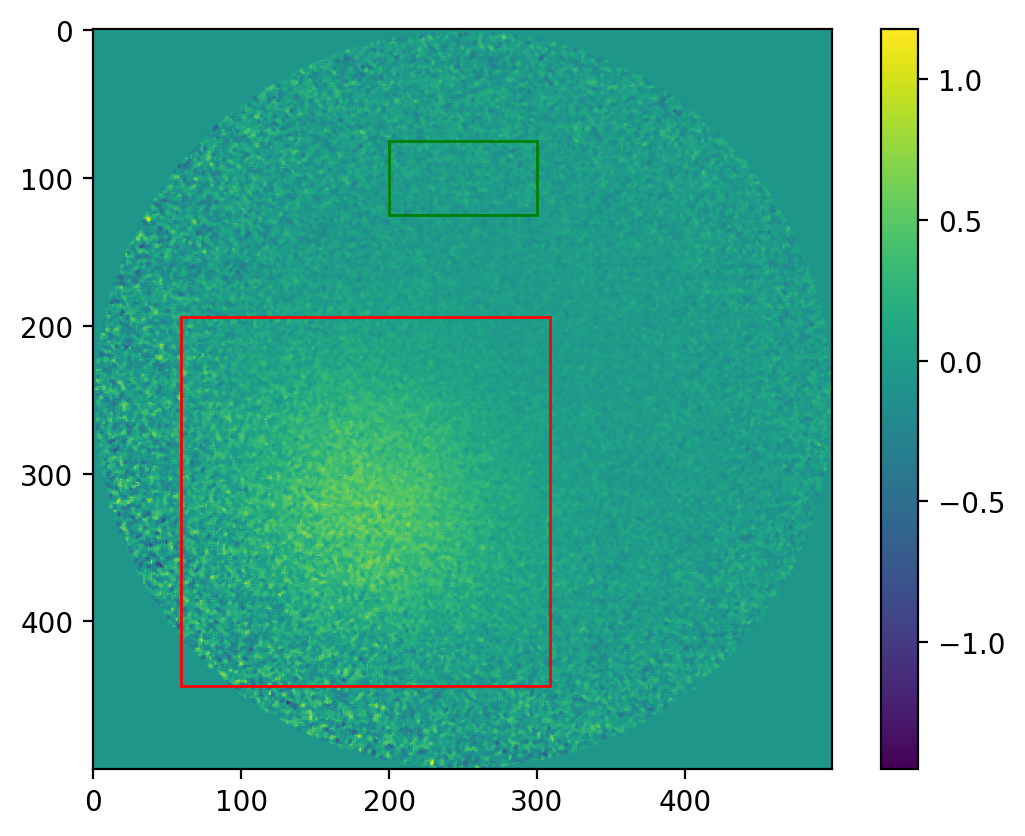

In [101]:
data.data[27].plot_blob()

In [134]:
def od_max(run):
    return run.popt_x[0]-run.popt_x[3]

str_dat = data.structure_data(od_max)

In [135]:
popt, pcov = curve_fit(lineshape, data.vlist, means, sigma = errs, p0 = [20, .7, 1])

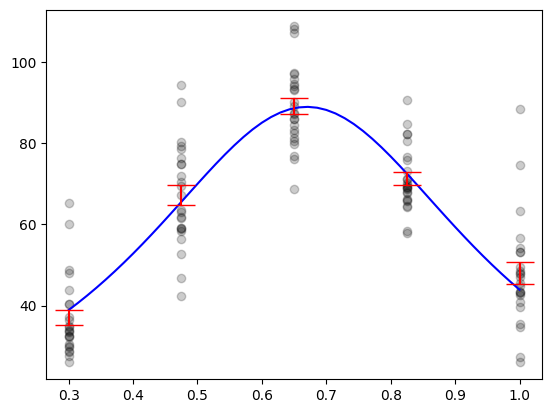

In [136]:
means = np.fromiter(map(np.mean, str_dat.values()), float)
errs = np.fromiter(map(np.std, str_dat.values()), float)/5

xax = np.linspace(min(data.vlist), max(data.vlist), 50)
plt.plot(xax, [lineshape(x, *popt) for x in xax], color = "b")
plt.errorbar(data.vlist, means, yerr = errs, linestyle = "None", color = "r", capsize=10)
for dat in data.data:
    plt.scatter(dat.value, od_max(dat), color = "k", alpha=.2, marker = "o")


In [91]:
def lineshape(x, A, w0, gamma):
    return A/((x-w0)**2+gamma**2/4)